# Distributions

Interesting sources: 
- https://app.datacamp.com/learn/courses/foundations-of-probability-in-python

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

![](https://wherethewindsblow.com/wp-content/uploads/2023/06/JUMBO-Six-sided-white-dice.jpg)

In [2]:
minValue = 1
maxValue = 6
numberOfSamples = 6 # Increase number to show that it converges to a uniform distribution

In [3]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [4]:
results

0    4
1    3
2    6
3    3
4    1
5    1
dtype: int32

<Axes: >

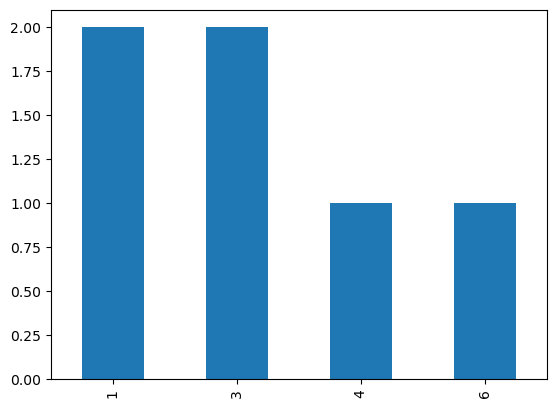

In [5]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [6]:
averageLength = 174.25
stdLength = 8
numberOfPeopleToSample = 3 # Play with these values to show the impact on the histogram

In [7]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [8]:
randomLengths

0    170.129578
1    168.439248
2    177.875441
dtype: float64

<Axes: ylabel='Frequency'>

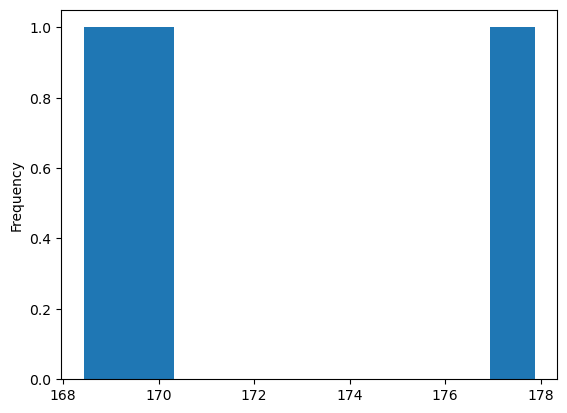

In [9]:
randomLengths.plot(kind='hist', bins=10)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [10]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [11]:
sampleMeans

[175.33441287761073,
 172.95547722627285,
 172.24880952573213,
 175.25806044200056,
 174.7972920268778,
 175.74841439531804,
 174.57963204006876,
 174.93457238900316,
 175.02226120772536,
 174.65223385033423]

<Axes: ylabel='Frequency'>

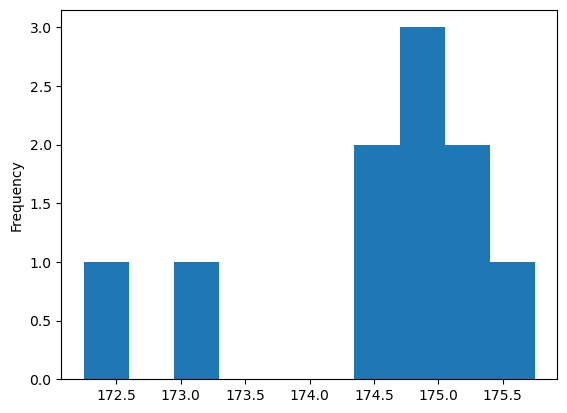

In [12]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

In [13]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<Axes: ylabel='Frequency'>

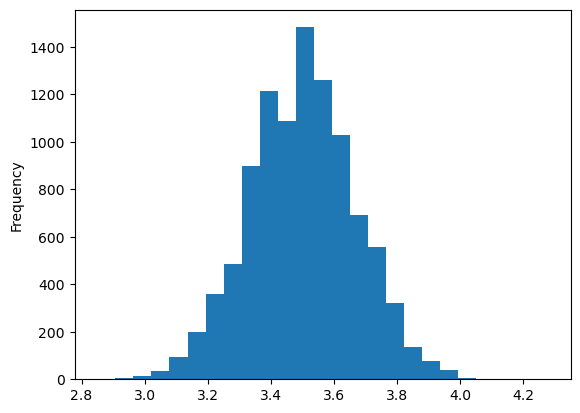

In [14]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://datatab.net/assets/tutorial/confidence_interval.png)

![](https://datatab.net/assets/tutorial/Confidence_interval_formula.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [15]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(172.88433161599303, 176.42013608467542)

In [16]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(3.068678741454304, 3.771321258545696)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [17]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(5.709732481507366, 5.976934185159301)

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm


![](https://i.imgur.com/0v1CGNV.png)<br>
Findings: ...<br>

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)<br>
Assumptions: ...<br>
Findings: ...<br>